In [1]:
suppressPackageStartupMessages({
    library(ComplexHeatmap)
    library(circlize)
    library(CellChat)
    library(Seurat)
    library(tidyseurat)
})

o<-function(w,h)options(repr.plot.width=w, repr.plot.height=h)

In [2]:
library('readxl')

#  EPHA , NRXN,  SLIT
subset_EPHA = read_excel("subset_EPHA_edited.xlsx")
subset_NRXN = read_excel("subset_NRXN_edited.xlsx")
subset_ROBO = read_excel("subset_SLIT_ROBO_edited.xlsx")

In [2]:
seu.all.early = readRDS('/oak/stanford/groups/xiaojie/chensj16/data/engreitz-lab/seu.early.RDS')


In [4]:
cell.oi = unique(c(subset_EPHA$source, subset_EPHA$target))
seu.EPHA <- seu.all.early %>% filter(Rounded.PCW ==8) %>% filter(New_Name %in%  cell.oi)

cell.oi = unique(c(subset_NRXN$source, subset_NRXN$target))
seu.NRXN <- seu.all.early %>% filter(Rounded.PCW ==8) %>% filter(New_Name %in%  cell.oi)

cell.oi = unique(c(subset_ROBO$source, subset_ROBO$target))
seu.ROBO <- seu.all.early %>% filter(Rounded.PCW ==8) %>% filter(New_Name %in%  cell.oi)

Warning message in is_sample_feature_deprecated_used(.data, (enquos(..., .ignore_empty = "all") %>% :
“tidyseurat says: from version 1.3.1, the special columns including cell id (colnames(se)) has changed to ".cell". This dataset is returned with the old-style vocabulary (cell), however, we suggest to update your workflow to reflect the new vocabulary (.cell).”
Warning message in is_sample_feature_deprecated_used(.data, (enquos(..., .ignore_empty = "all") %>% :
“tidyseurat says: from version 1.3.1, the special columns including cell id (colnames(se)) has changed to ".cell". This dataset is returned with the old-style vocabulary (cell), however, we suggest to update your workflow to reflect the new vocabulary (.cell).”
Warning message in is_sample_feature_deprecated_used(.data, (enquos(..., .ignore_empty = "all") %>% :
“tidyseurat says: from version 1.3.1, the special columns including cell id (colnames(se)) has changed to ".cell". This dataset is returned with the old-style vocabulary 

In [5]:
data.frame(
    old=c(subset_EPHA$source, subset_EPHA$target),
    new=c(subset_EPHA$Plot_grouping_source, subset_EPHA$Plot_grouping_target)
) %>% unique -> lut

meta <- seu.EPHA[[]]
meta$PlotGrouping = meta$New_Name
meta$PlotGrouping = recode(meta$PlotGrouping, !!!setNames(lut$new, lut$old))
meta -> seu.EPHA[[]]

In [6]:
data.frame(
    old=c(subset_NRXN$source, subset_NRXN$target),
    new=c(subset_NRXN$Plot_grouping_source, subset_NRXN$Plot_grouping_target)
) %>% unique -> lut

meta <- seu.NRXN[[]]
meta$PlotGrouping = meta$New_Name
meta$PlotGrouping = recode(meta$PlotGrouping, !!!setNames(lut$new, lut$old))
meta -> seu.NRXN[[]]

In [7]:
data.frame(
    old=c(subset_ROBO$source, subset_ROBO$target),
    new=c(subset_ROBO$Plot_grouping_source, subset_ROBO$Plot_grouping_target)
) %>% unique -> lut

meta <- seu.ROBO[[]]
meta$PlotGrouping = meta$New_Name
meta$PlotGrouping = recode(meta$PlotGrouping, !!!setNames(lut$new, lut$old))
meta -> seu.ROBO[[]]

In [8]:
rm(seu.all.early); gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,5974505,319.1,12401875,662.4,8822470,471.2
Vcells,1104324406,8425.4,4531972872,34576.3,4679602831,35702.6


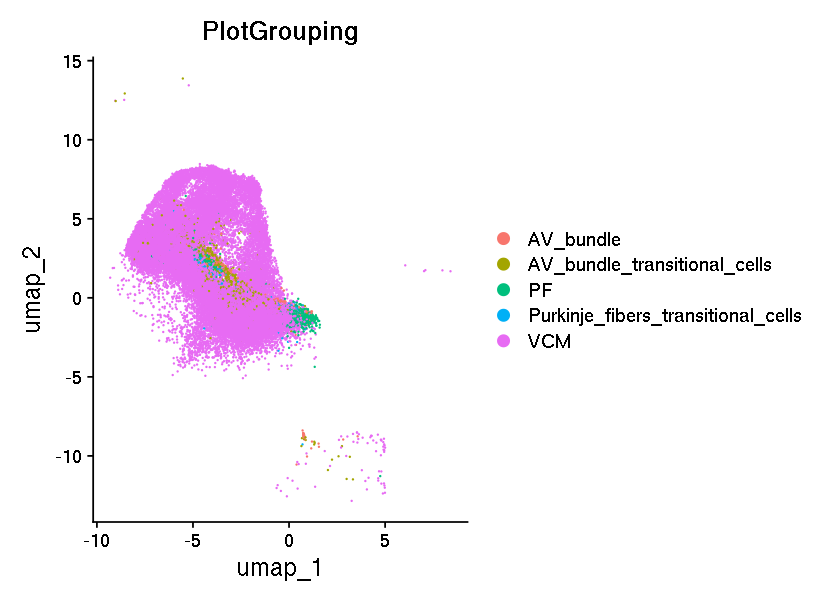

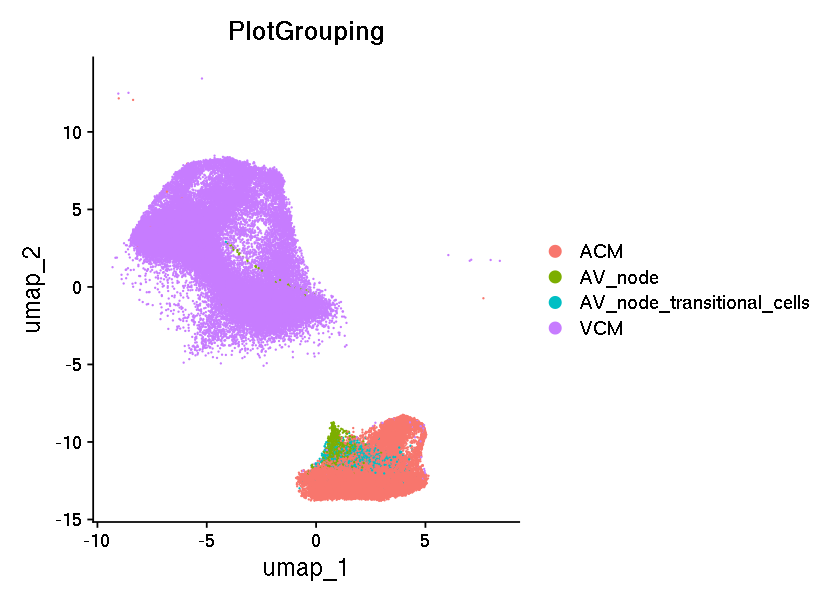

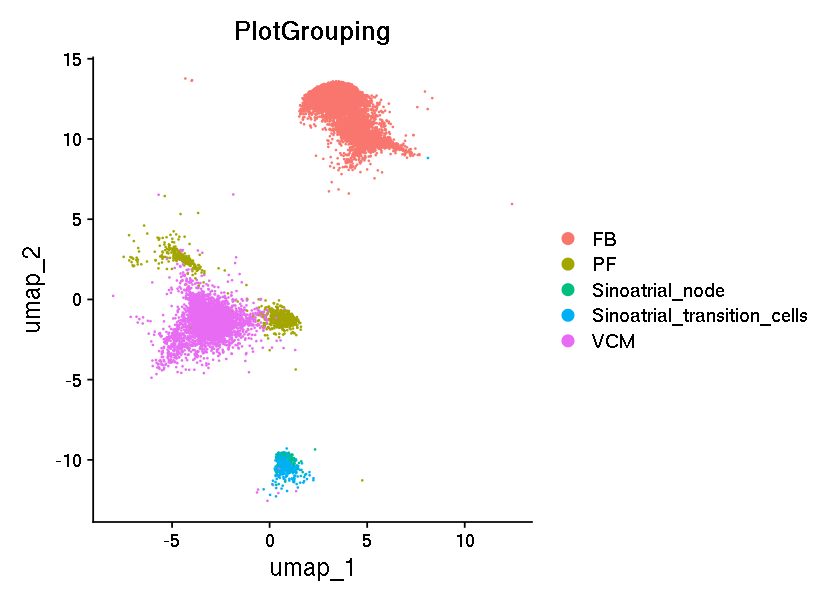

In [9]:
o(7,5)
DimPlot(seu.EPHA, group.by='PlotGrouping')
DimPlot(seu.NRXN, group.by='PlotGrouping')
DimPlot(seu.ROBO, group.by='PlotGrouping')

In [10]:
suppressPackageStartupMessages({
    library(CellChat)
})

CellChatDB <- CellChatDB.human # use CellChatDB.mouse if running on mouse data
CellChatDB.use <- subsetDB(CellChatDB, search = c("Cell-Cell Contact","Secreted Signaling","Non-protein Signaling"), key = "annotation")

The non-protein signaling is now included for CellChat analysis, which is usually used for neuron-neuron and metabolic communication!



In [11]:
cellchat.EPHA     <- createCellChat(object = seu.EPHA, group.by = "PlotGrouping", assay = "RNA")
cellchat.EPHA@DB  <- CellChatDB.use
cellchat.EPHA <-  cellchat.EPHA %>% subsetData %>% identifyOverExpressedGenes %>% 
               identifyOverExpressedInteractions %>% computeCommunProb(type = "triMean") %>%
               filterCommunication(min.cells = 3) %>% computeCommunProbPathway() %>% aggregateNet() %>% netAnalysis_computeCentrality(slot.name = "netP")


[1] "Create a CellChat object from a Seurat object"
The `meta.data` slot in the Seurat object is used as cell meta information 


Warning message in createCellChat(object = seu.EPHA, group.by = "PlotGrouping", :
“The 'meta' data does not have a column named `samples`. We now add this column and all cells are assumed to belong to `sample1`! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  AV_bundle, AV_bundle_transitional_cells, PF, Purkinje_fibers_transitional_cells, VCM 
triMean is used for calculating the average gene expression per cell group. 
The number of highly variable ligand-receptor pairs used for signaling inference is 1144 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2024-10-25 00:17:11.462398]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-10-25 00:25:18.4998]"


In [12]:
rm(seu.EPHA); gc();

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,6333018,338.3,12401875,662.4,12401875,662.4
Vcells,865762529,6605.3,3625578298,27661.0,4679602831,35702.6


In [13]:
cellchat.NRXN     <- createCellChat(object = seu.NRXN, group.by = "PlotGrouping", assay = "RNA")
cellchat.NRXN@DB  <- CellChatDB.use
cellchat.NRXN     <-  cellchat.NRXN %>% subsetData %>% identifyOverExpressedGenes %>% 
               identifyOverExpressedInteractions %>% computeCommunProb(type = "triMean") %>%
               filterCommunication(min.cells = 3) %>% computeCommunProbPathway() %>% aggregateNet() %>% netAnalysis_computeCentrality(slot.name = "netP")


[1] "Create a CellChat object from a Seurat object"
The `meta.data` slot in the Seurat object is used as cell meta information 


Warning message in createCellChat(object = seu.NRXN, group.by = "PlotGrouping", :
“The 'meta' data does not have a column named `samples`. We now add this column and all cells are assumed to belong to `sample1`! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  ACM, AV_node, AV_node_transitional_cells, VCM 
triMean is used for calculating the average gene expression per cell group. 
The number of highly variable ligand-receptor pairs used for signaling inference is 1305 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2024-10-25 00:25:42.645226]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-10-25 00:36:56.022701]"


In [14]:
rm(seu.NRXN); gc();

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,6333745,338.3,12401875,662.4,12401875,662.4
Vcells,497107424,3792.7,2900462639,22128.8,4679602831,35702.6


In [15]:
cellchat.ROBO     <- createCellChat(object = seu.ROBO, group.by = "PlotGrouping", assay = "RNA")
cellchat.ROBO@DB  <- CellChatDB.use
cellchat.ROBO     <-  cellchat.ROBO %>% subsetData %>% identifyOverExpressedGenes %>% 
               identifyOverExpressedInteractions %>% computeCommunProb(type = "triMean") %>%
               filterCommunication(min.cells = 3) %>% computeCommunProbPathway() %>% aggregateNet() %>% netAnalysis_computeCentrality(slot.name = "netP")


[1] "Create a CellChat object from a Seurat object"
The `meta.data` slot in the Seurat object is used as cell meta information 


Warning message in createCellChat(object = seu.ROBO, group.by = "PlotGrouping", :
“The 'meta' data does not have a column named `samples`. We now add this column and all cells are assumed to belong to `sample1`! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  FB, PF, Sinoatrial_node, Sinoatrial_transition_cells, VCM 
triMean is used for calculating the average gene expression per cell group. 
The number of highly variable ligand-receptor pairs used for signaling inference is 1353 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2024-10-25 00:37:01.310925]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-10-25 00:40:07.00282]"


In [16]:
rm(seu.ROBO); gc();

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,6335072,338.4,12401875,662.4,12401875,662.4
Vcells,531372593,4054.1,1856296090,14162.5,4679602831,35702.6


In [17]:
saveRDS(cellchat.EPHA, "cellchat.EPHA.rds")
saveRDS(cellchat.NRXN, "cellchat.NRXN.rds")
saveRDS(cellchat.ROBO, "cellchat.ROBO.rds")

In [4]:
cellchat.EPHA = readRDS("cellchat.EPHA.rds")
cellchat.NRXN = readRDS("cellchat.NRXN.rds")
cellchat.ROBO = readRDS("cellchat.ROBO.rds")

In [8]:
paste(subset_EPHA$Plot_grouping_source, subset_EPHA$Plot_grouping_target, sep='->') %>% unique

[1] "VCM->AV_bundle"                         
[2] "VCM->PF"                                
[3] "AV_bundle_transitional_cells->AV_bundle"
[4] "Purkinje_fibers_transitional_cells->PF"

In [9]:
target_array <- cellchat.EPHA@net$prob

# 设置要保留的组合
keep_combinations <- list(
  c("VCM", "AV_bundle"),
  c("VCM", "PF"),
  c("AV_bundle_transitional_cells", "AV_bundle"),
  c("Purkinje_fibers_transitional_cells", "PF")
)

for (i in seq_along(dimnames(target_array)[[1]])) {
  for (j in seq_along(dimnames(target_array)[[2]])) {
    combination <- c(dimnames(target_array)[[1]][i], dimnames(target_array)[[2]][j]) 
    if (!any(sapply(keep_combinations, function(x) all(x == combination)))) {
        target_array[i, j, ] <- 0
    }
  }
}
target_array -> cellchat.EPHA@net$prob

In [11]:
target_array <- cellchat.NRXN@net$prob

# 设置要保留的组合
keep_combinations <- list(
  c("AV_node", "VCM"),
  c("AV_node", "ACM"),
  c("AV_node", "AV_node_transitional_cells")
)

for (i in seq_along(dimnames(target_array)[[1]])) {
  for (j in seq_along(dimnames(target_array)[[2]])) {
    combination <- c(dimnames(target_array)[[1]][i], dimnames(target_array)[[2]][j]) 
    if (!any(sapply(keep_combinations, function(x) all(x == combination)))) {
        target_array[i, j, ] <- 0
    }
  }
}
target_array -> cellchat.NRXN@net$prob

In [12]:
target_array <- cellchat.ROBO@net$prob

# 设置要保留的组合
keep_combinations <- list(
  c("Sinoatrial_node", "FB"),
  c("Sinoatrial_node", "Sinoatrial_transition_cells"),
  c("PF", "VCM")
)

for (i in seq_along(dimnames(target_array)[[1]])) {
  for (j in seq_along(dimnames(target_array)[[2]])) {
    combination <- c(dimnames(target_array)[[1]][i], dimnames(target_array)[[2]][j]) 
    if (!any(sapply(keep_combinations, function(x) all(x == combination)))) {
        target_array[i, j, ] <- 0
    }
  }
}
target_array -> cellchat.ROBO@net$prob

# visualization

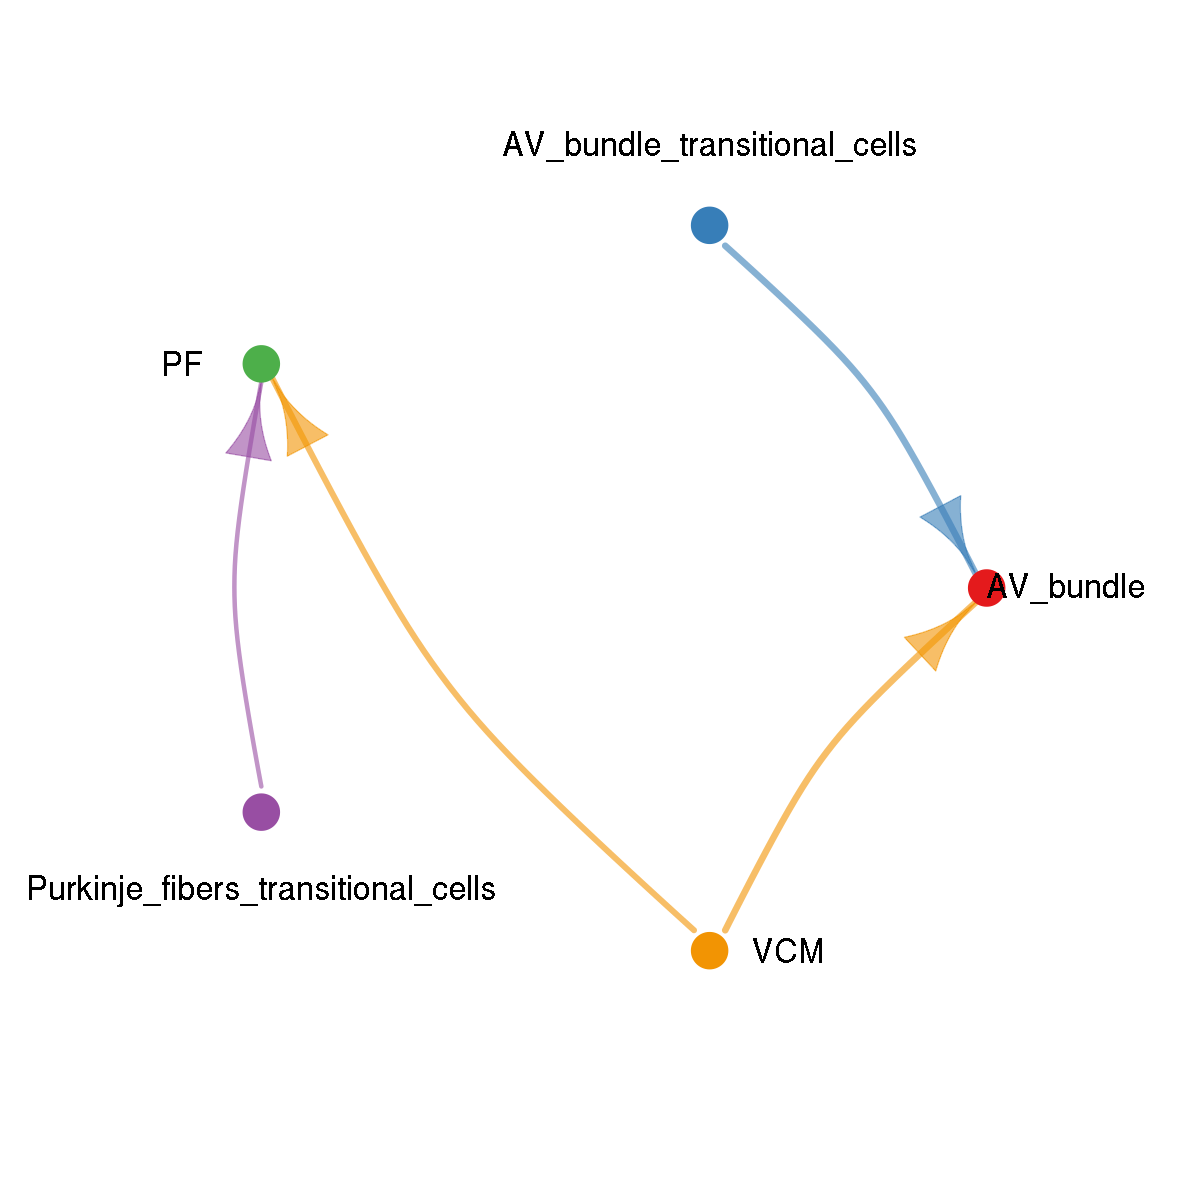

In [11]:
o(10,10)
p=netVisual_aggregate(cellchat.EPHA, signaling = 'EPHA', layout = "circle",
                      weight.scale=T, edge.width.max=5, vertex.label.cex = 1.8, arrow.size=2, show.legend=T)
print(p)

pdf 
  2

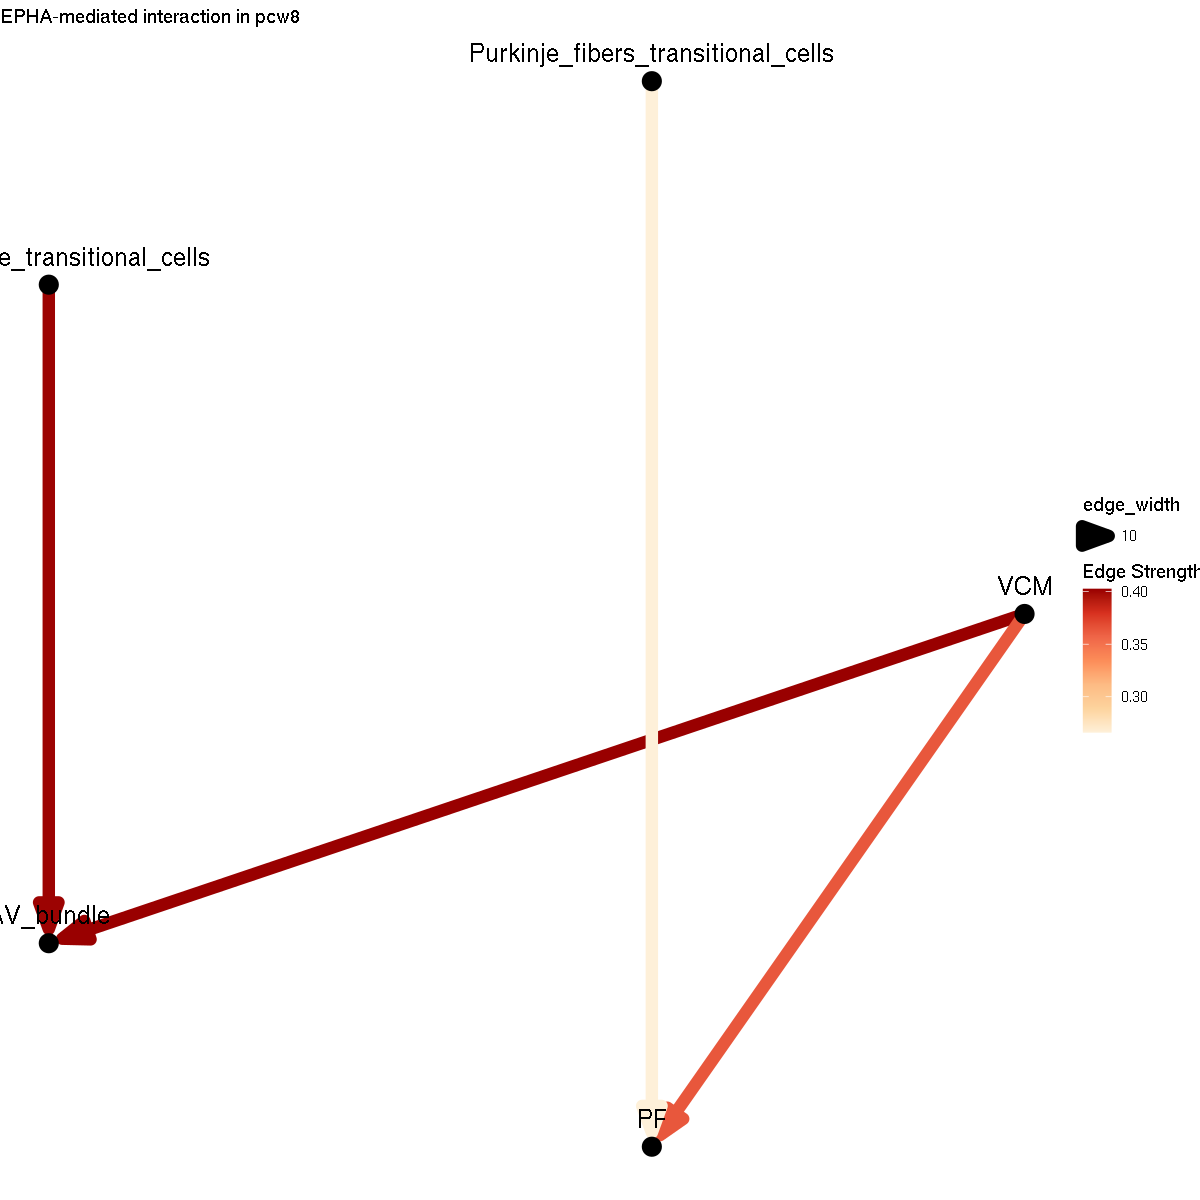

In [90]:
library(igraph)
library(ggraph)
library(tidygraph)

edge_data <- rbind(
    subsetCommunication(object = cellchat.EPHA, sources.use = 'VCM', targets.use = 'AV_bundle') %>%  filter(pathway_name=='EPHA') %>%  select(c('source','target','prob')) %>%group_by(source, target) %>% summarise(edge_strength = sum(prob), .groups = 'drop') %>%rename(from = source, to = target),
    subsetCommunication(object = cellchat.EPHA, sources.use = 'VCM', targets.use = 'PF') %>%  filter(pathway_name=='EPHA') %>%  select(c('source','target','prob')) %>%group_by(source, target) %>% summarise(edge_strength = sum(prob), .groups = 'drop')%>%rename(from = source, to = target),
    subsetCommunication(object = cellchat.EPHA, sources.use = 'Purkinje_fibers_transitional_cells', targets.use = 'PF') %>%  filter(pathway_name=='EPHA') %>%  select(c('source','target','prob')) %>%group_by(source, target) %>% summarise(edge_strength = sum(prob), .groups = 'drop')%>%rename(from = source, to = target),
    subsetCommunication(object = cellchat.EPHA, sources.use = 'AV_bundle_transitional_cells', targets.use = 'AV_bundle') %>%  filter(pathway_name=='EPHA') %>%  select(c('source','target','prob')) %>%group_by(source, target) %>% summarise(edge_strength = sum(prob), .groups = 'drop')%>%rename(from = source, to = target)
)


# Create a directed graph from the data frame
graph <- graph_from_data_frame(edge_data, directed = TRUE)
graph_tidy <- as_tbl_graph(graph)


# Plot the directed graph with ggraph
p= ggraph(graph_tidy, layout = "circle") +
  geom_edge_link(aes(width=10, color = edge_strength),
                 end_cap = circle(3, 'mm'),
                 arrow =arrow(type = "closed", length = unit(6, "mm"), angle = 20, ends = "last")) +
  
  #scale_edge_width(range = c(0.5, 3)) +  # Adjust range as needed
  scale_edge_color_distiller(palette = "OrRd", direction = 1)+
  geom_node_point(size = 5) + 
  geom_node_text(aes(label = name), vjust = -1, size = 5) +  # Display node names
  theme_void() + ggtitle('EPHA-mediated interaction in pcw8')+
  labs(edge_color = "Edge Strength") + theme(legend.position = "right")

pdf('EPHA-signaling.pcw8.pdf', width=10, height = 10)
p
dev.off()

o(10,10)
p

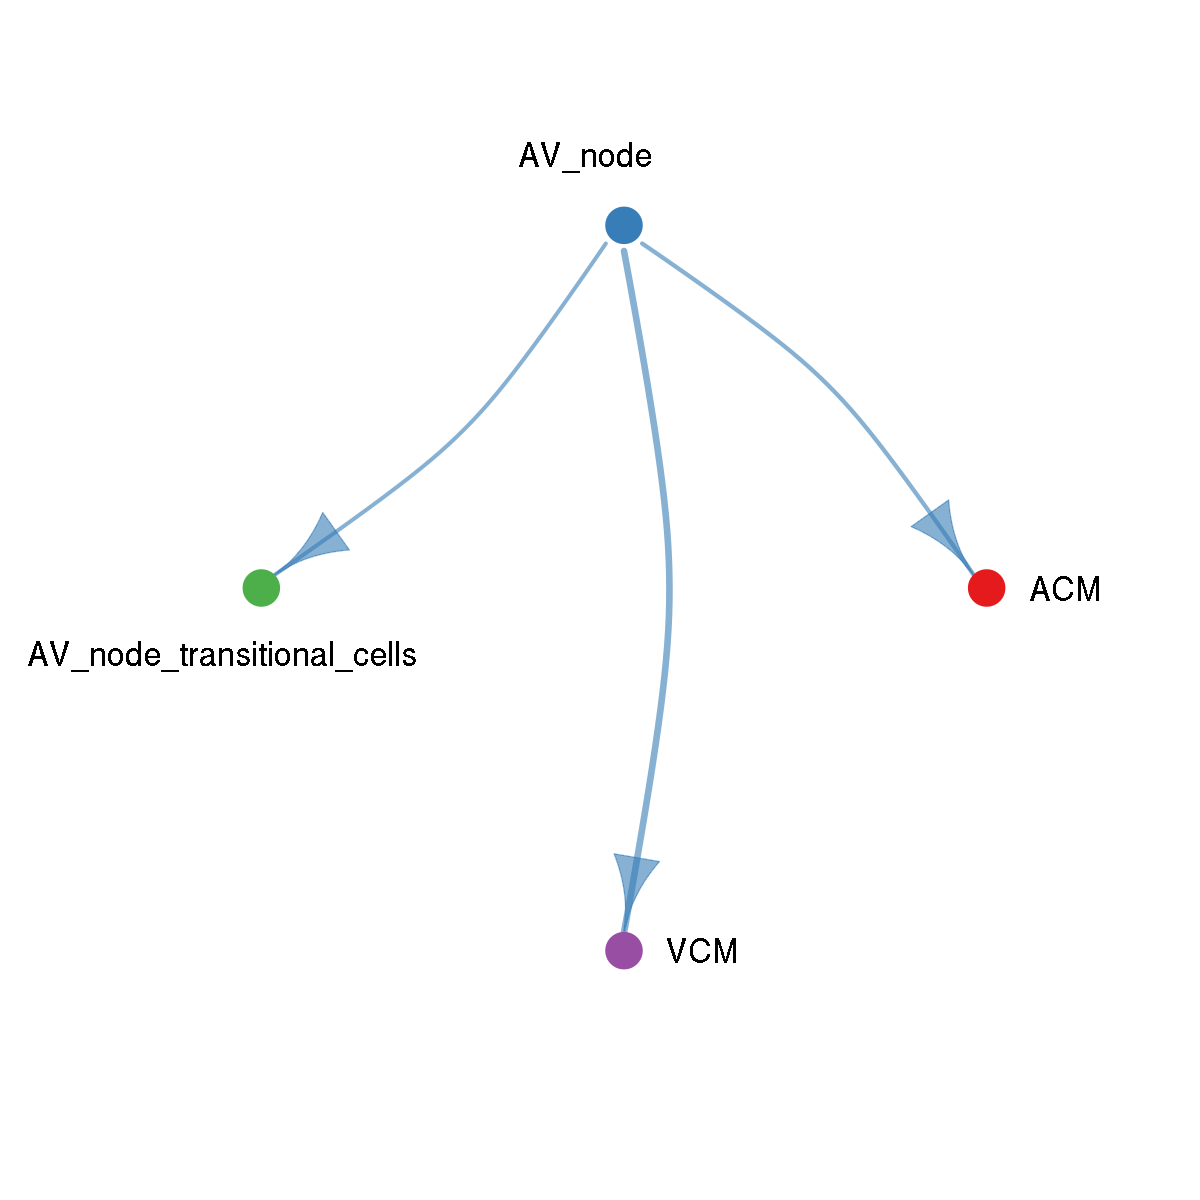

In [71]:
# NRXN, etc.
o(10,10)
o(10,10)
p=netVisual_aggregate(cellchat.NRXN, signaling = 'NRXN', layout = "circle", weight.scale=T, 
                      edge.width.max=5, vertex.label.cex = 1.8, arrow.size=2, show.legend=T)
print(p)


Using "tree" as default layout


pdf 
  2

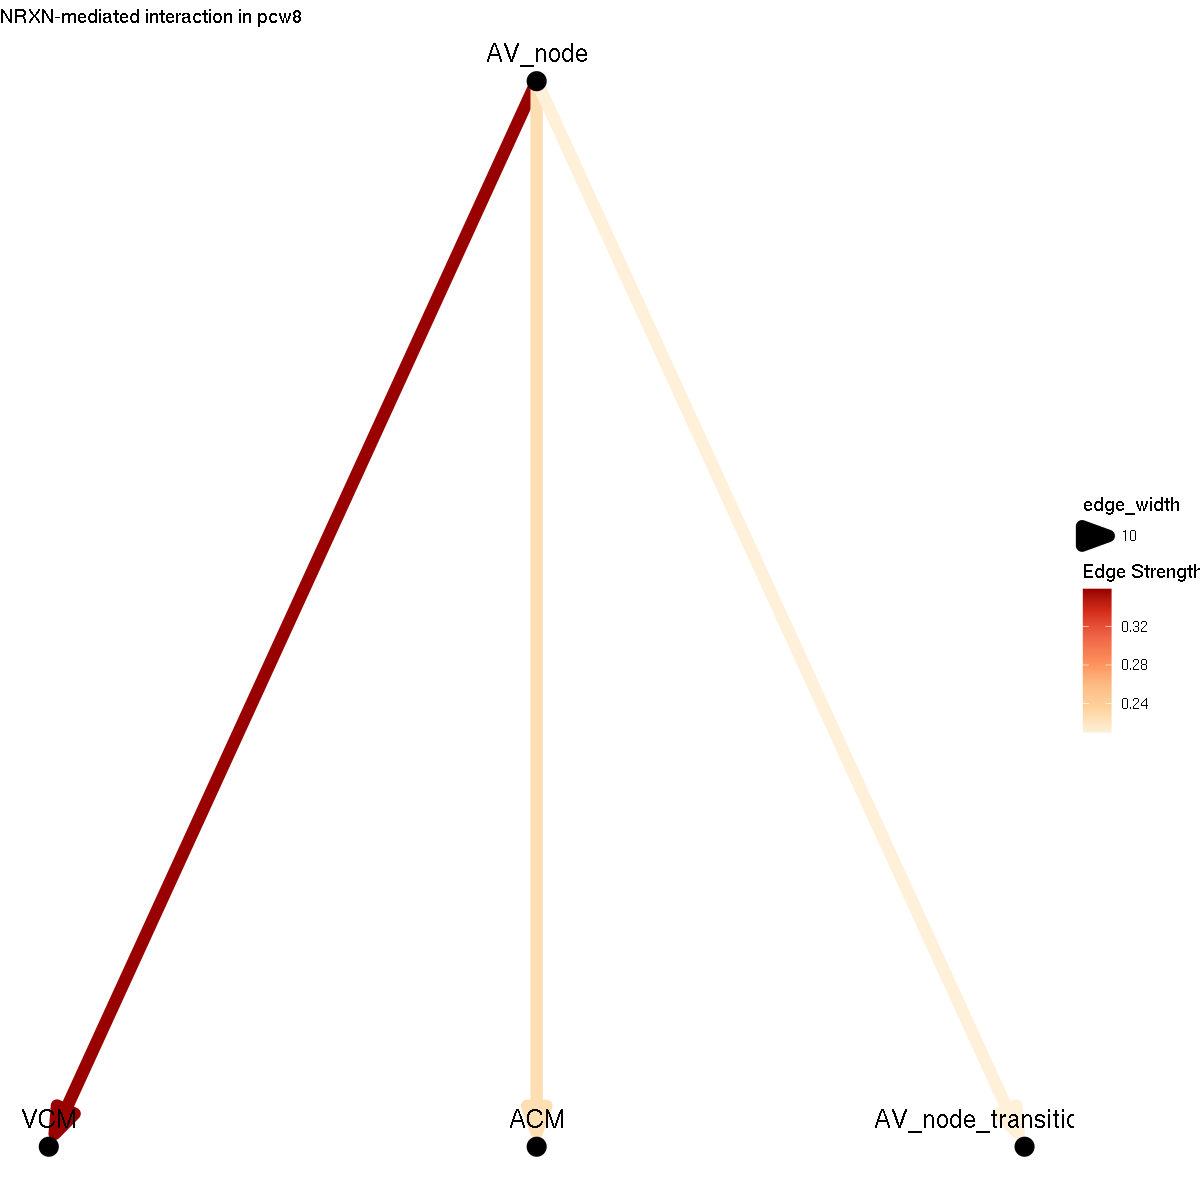

In [103]:
library(igraph)
library(ggraph)
library(tidygraph)

edge_data <- rbind(
    subsetCommunication(object = cellchat.NRXN, sources.use = 'AV_node', targets.use = 'VCM') %>%  filter(pathway_name=='NRXN') %>%  select(c('source','target','prob')) %>%group_by(source, target) %>% summarise(edge_strength = sum(prob), .groups = 'drop') %>%rename(from = source, to = target),
    subsetCommunication(object = cellchat.NRXN, sources.use = 'AV_node', targets.use = 'ACM') %>%  filter(pathway_name=='NRXN') %>%  select(c('source','target','prob')) %>%group_by(source, target) %>% summarise(edge_strength = sum(prob), .groups = 'drop')%>%rename(from = source, to = target),
    subsetCommunication(object = cellchat.NRXN, sources.use = 'AV_node', targets.use = 'AV_node_transitional_cells') %>%  filter(pathway_name=='NRXN') %>%  select(c('source','target','prob')) %>%group_by(source, target) %>% summarise(edge_strength = sum(prob), .groups = 'drop')%>%rename(from = source, to = target)
)

# Create a directed graph from the data frame
graph <- graph_from_data_frame(edge_data, directed = TRUE)
graph_tidy <- as_tbl_graph(graph)


# Plot the directed graph with ggraph
p= ggraph(graph_tidy, layout = "auto") +
  geom_edge_link(aes(width=10, color = edge_strength),
                 end_cap = circle(3, 'mm'),
                 arrow =arrow(type = "closed", length = unit(6, "mm"), angle = 20, ends = "last")) +
  
  #scale_edge_width(range = c(0.5, 3)) +  # Adjust range as needed
  scale_edge_color_distiller(palette = "OrRd", direction = 1)+
  geom_node_point(size = 5) + 
  geom_node_text(aes(label = name), vjust = -1, size = 5) +  # Display node names
  theme_void() + ggtitle('NRXN-mediated interaction in pcw8')+
  labs(edge_color = "Edge Strength") + theme(legend.position = "right")

pdf('NRXN-signaling.pcw8.pdf', width=10, height = 10)
p
dev.off()

o(10,10)
p

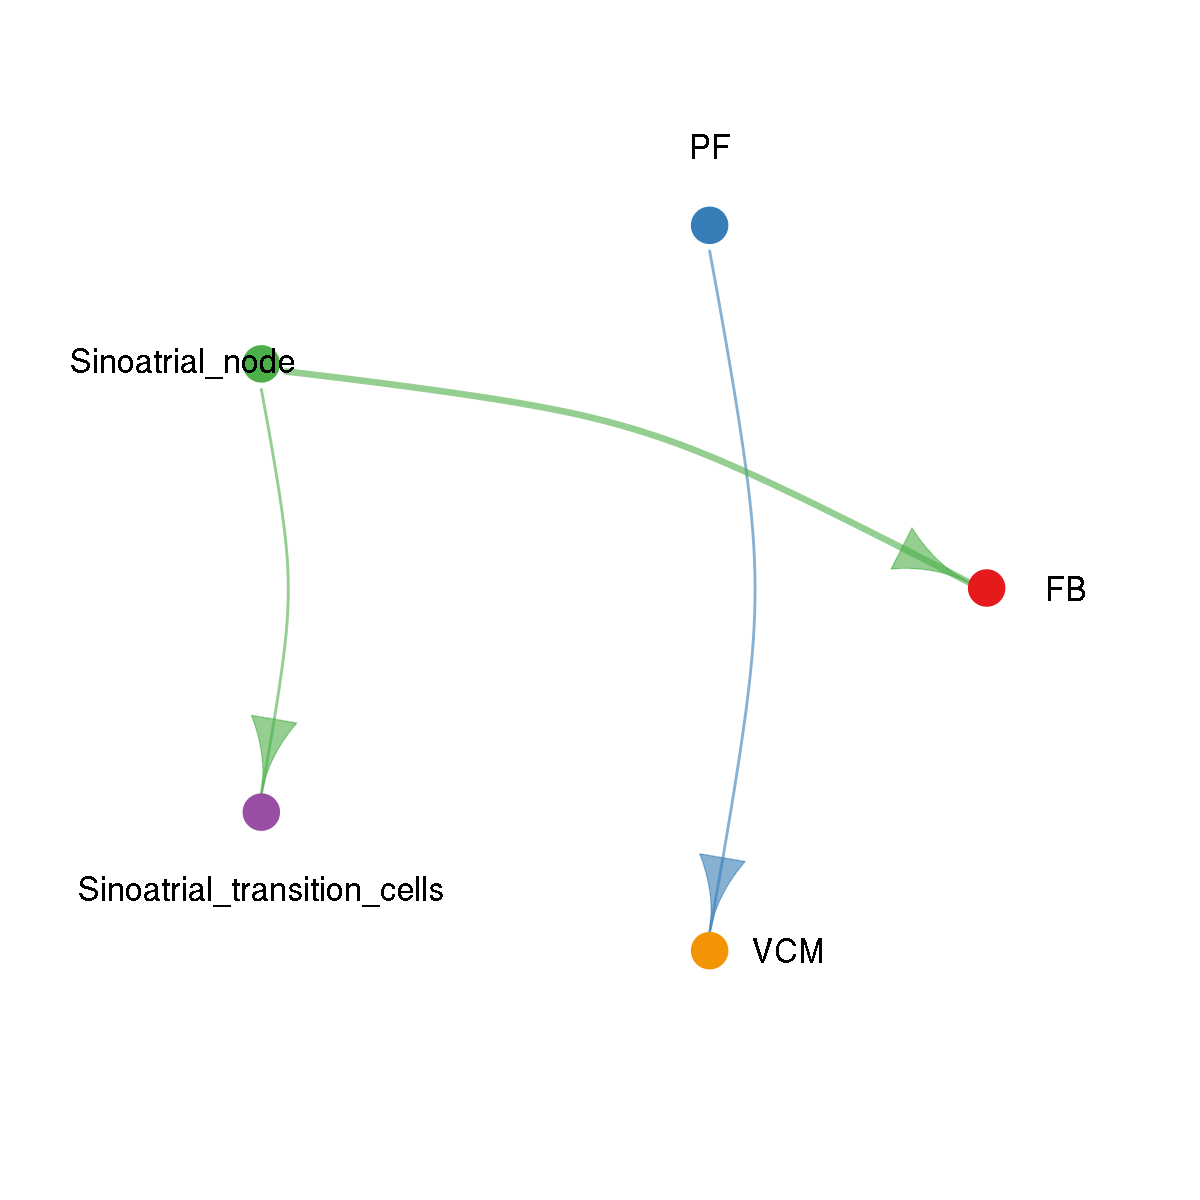

In [76]:

# SLIT1-ROBO1, etc.

o(10,10)
# NRXN, etc.
o(10,10)
o(10,10)
p=netVisual_aggregate(cellchat.ROBO, signaling = 'SLIT', layout = "circle", weight.scale=T, 
                      edge.width.max=5, vertex.label.cex = 1.8, arrow.size=2, show.legend=T)
print(p)




Using "tree" as default layout


pdf 
  2

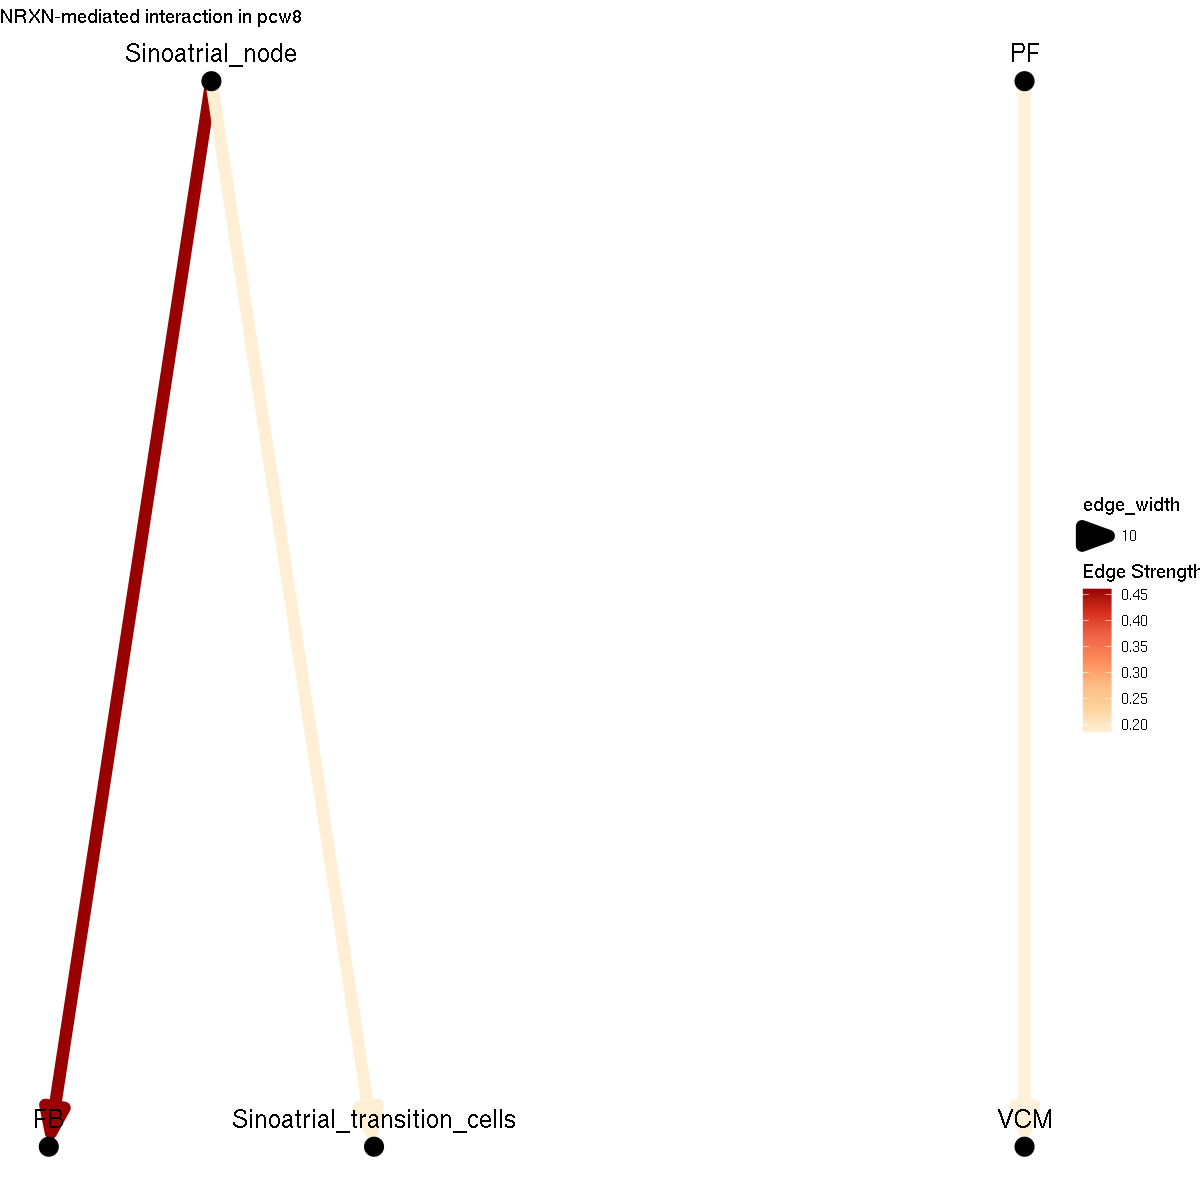

In [102]:
library(igraph)
library(ggraph)
library(tidygraph)

edge_data <- rbind(
    subsetCommunication(object = cellchat.ROBO, sources.use = 'PF', targets.use = 'VCM') %>%  filter(pathway_name=='SLIT') %>%  select(c('source','target','prob')) %>%group_by(source, target) %>% summarise(edge_strength = sum(prob), .groups = 'drop') %>%rename(from = source, to = target),
    subsetCommunication(object = cellchat.ROBO, sources.use = 'Sinoatrial_node', targets.use = 'FB') %>%  filter(pathway_name=='SLIT') %>%  select(c('source','target','prob')) %>%group_by(source, target) %>% summarise(edge_strength = sum(prob), .groups = 'drop')%>%rename(from = source, to = target),
    subsetCommunication(object = cellchat.ROBO, sources.use = 'Sinoatrial_node', targets.use = 'Sinoatrial_transition_cells') %>%  filter(pathway_name=='SLIT') %>%  select(c('source','target','prob')) %>%group_by(source, target) %>% summarise(edge_strength = sum(prob), .groups = 'drop')%>%rename(from = source, to = target)
)

# Create a directed graph from the data frame
graph <- graph_from_data_frame(edge_data, directed = TRUE)
graph_tidy <- as_tbl_graph(graph)


# Plot the directed graph with ggraph
p= ggraph(graph_tidy, layout = "auto") +
  geom_edge_link(aes(width=10, color = edge_strength),
                 end_cap = circle(3, 'mm'),
                 arrow =arrow(type = "closed", length = unit(6, "mm"), angle = 20, ends = "last")) +
  
  #scale_edge_width(range = c(0.5, 3)) +  # Adjust range as needed
  scale_edge_color_distiller(palette = "OrRd", direction = 1)+
  geom_node_point(size = 5) + 
  geom_node_text(aes(label = name), vjust = -1, size = 5) +  # Display node names
  theme_void() + ggtitle('NRXN-mediated interaction in pcw8')+
  labs(edge_color = "Edge Strength") + theme(legend.position = "right")

pdf('SLIT-signaling.pcw8.pdf', width=10, height = 10)
p
dev.off()

o(10,10)
p

In [71]:
LRs.show=data.frame(
interaction_name=unique(paste(subset_EPHA$ligand, subset_EPHA$receptor, sep='_'))
)

[[1]]

[[2]]


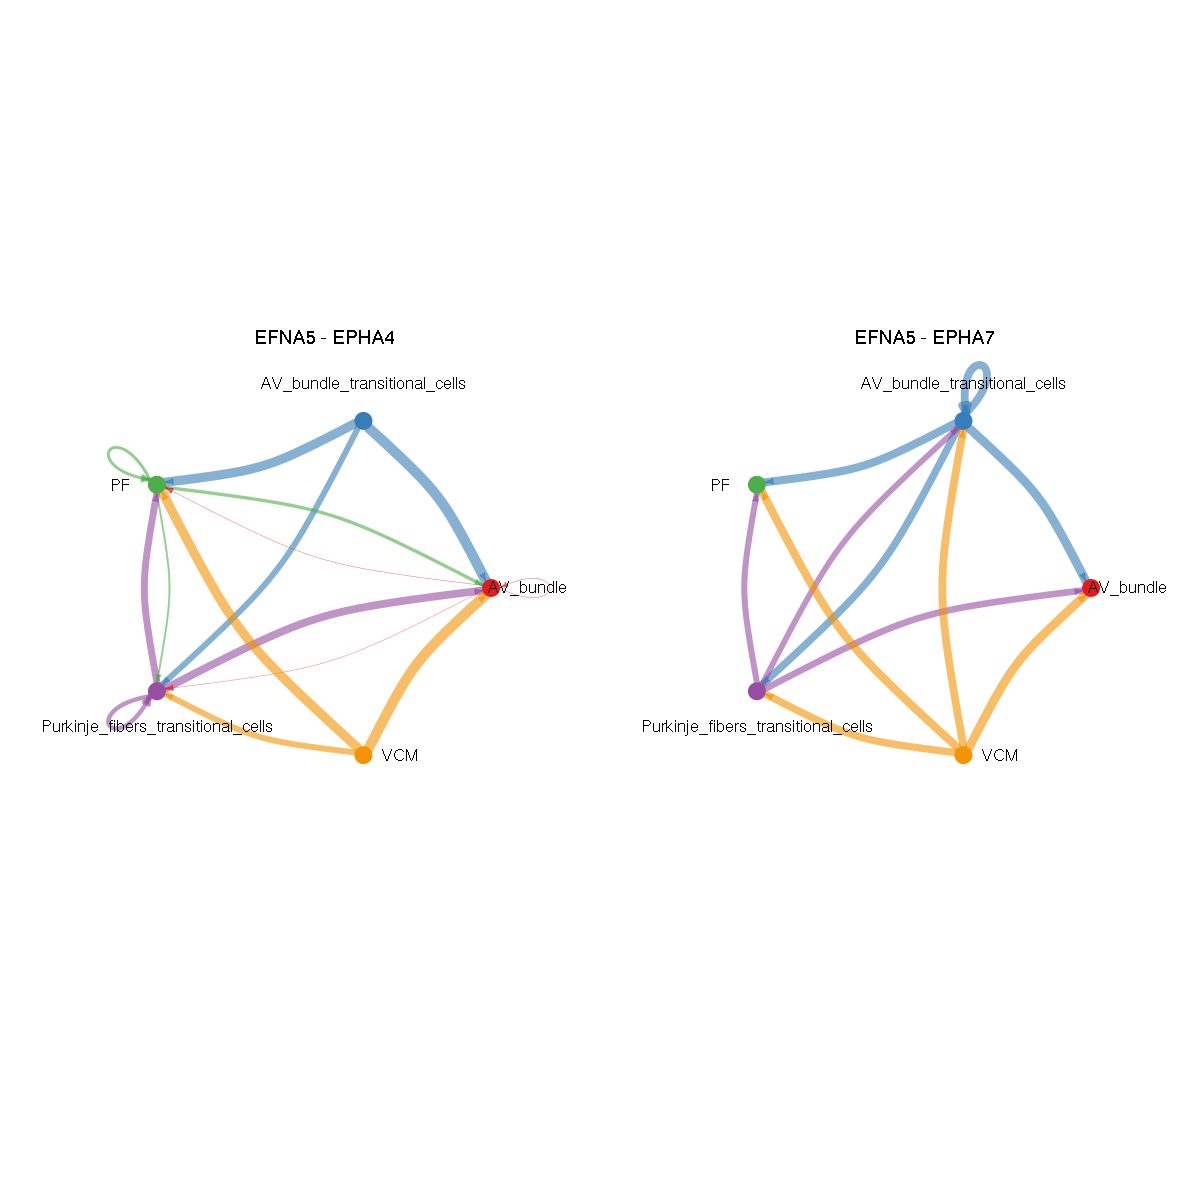

In [75]:
pathways.show='EPHA'
pairLR.CXCL <- extractEnrichedLR(cellchat, signaling = 'EPHA', geneLR.return = FALSE)
LR.show <- pairLR.CXCL[1,] # show one ligand-receptor pair
# Hierarchy plot
#vertex.receiver = seq(1,4) # a numeric vector
#netVisual_individual(cellchat, signaling = pathways.show,  pairLR.use = LR.show, vertex.receiver = vertex.receiver)
#> [[1]]
# Circle plot
sources = unique(c(subset_EPHA$source))
targets = unique(c(subset_EPHA$target))

o(10,10)
netVisual_individual(cellchat, signaling = pathways.show, pairLR.use = LRs.show, layout = 'circle')

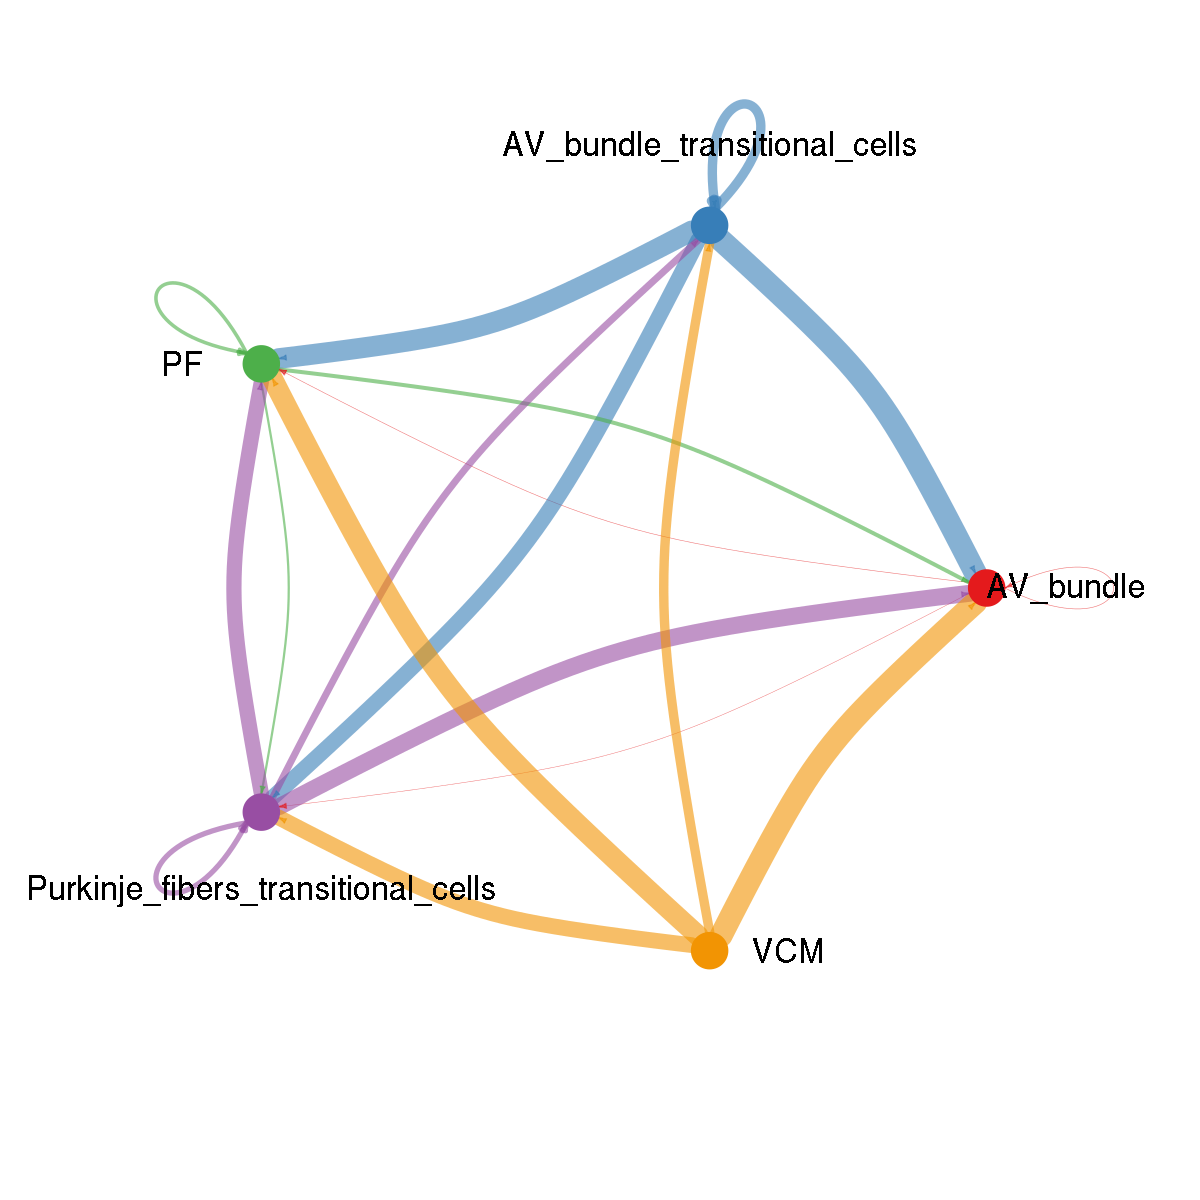

In [94]:
o(10,10)
p=netVisual_aggregate(cellchat, signaling = 'EPHA', layout = "circle", weight.scale	=T, edge.width.max=18,vertex.label.cex = 1.8, thresh=0.01)